# Neural Networks from Scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Training data

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Make a numpy array of data

In [3]:
data = np.array(data)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
print(f"Dimensions are {data.shape}")
print("Every row has first element as the label of the image and rest of elements as pixel values.")
print("This means that there are about 42000 different numbers and 785 columns including the labels")
m, n = data.shape

Dimensions are (42000, 785)
Every row has first element as the label of the image and rest of elements as pixel values.
This means that there are about 42000 different numbers and 785 columns including the labels


In [5]:
data_dev = data[0:40000].T
print(data_dev)
print("So now the top row has all the labels and every correpposnding column has all the pixel data of the label.")

[[1 0 1 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
So now the top row has all the labels and every correpposnding column has all the pixel data of the label.


In [6]:
Y_dev = data_dev[0]
print(Y_dev)
X_dev = data_dev[1:n]
X_dev = X_dev/255
print(X_dev)

[1 0 1 ... 0 0 3]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
data_train = data[40000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
print("This the data of the first label")
print(X_dev[:,0])

This the data of the first label
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         

### Initialize random weights and biases with init_params()

In [9]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

### The Activation functions

In [10]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def ReLU_deriv(Z):
    return Z > 0

In [11]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [12]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 1000 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [14]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 40000)

Iteration:  0
[6 2 6 ... 6 4 6] [2 3 9 ... 7 6 9]
0.1015
Iteration:  1000
[6 7 5 ... 7 6 9] [2 3 9 ... 7 6 9]
0.4925
Iteration:  2000
[2 7 5 ... 7 6 9] [2 3 9 ... 7 6 9]
0.6435
Iteration:  3000
[2 7 5 ... 7 6 9] [2 3 9 ... 7 6 9]
0.7355
Iteration:  4000
[2 7 5 ... 7 6 9] [2 3 9 ... 7 6 9]
0.777
Iteration:  5000
[2 7 7 ... 7 6 9] [2 3 9 ... 7 6 9]
0.801
Iteration:  6000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.8245
Iteration:  7000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.8395
Iteration:  8000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.849
Iteration:  9000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.8655
Iteration:  10000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.874
Iteration:  11000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.8815
Iteration:  12000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.889
Iteration:  13000
[2 7 3 ... 7 6 9] [2 3 9 ... 7 6 9]
0.8945
Iteration:  14000
[2 7 9 ... 7 6 9] [2 3 9 ... 7 6 9]
0.899
Iteration:  15000
[2 7 9 ... 7 6 9] [2 3 9 ... 7 6 9]
0.9035
Iteration:  16000
[2 7 9 ... 7 6 9] [2 3 9 

In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


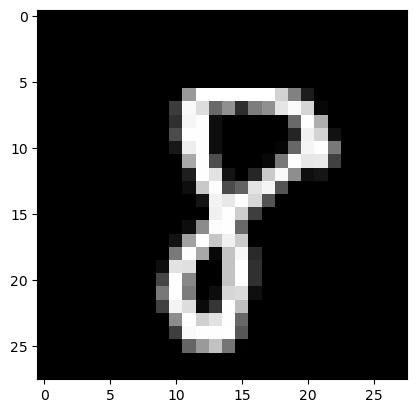

Prediction:  [9]
Label:  9


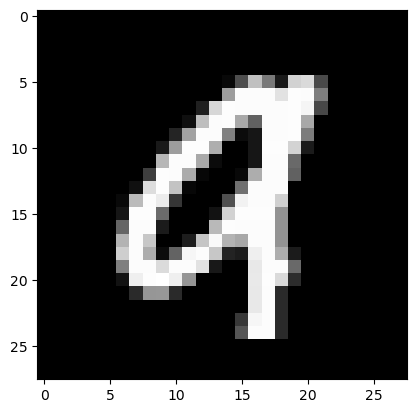

Prediction:  [0]
Label:  0


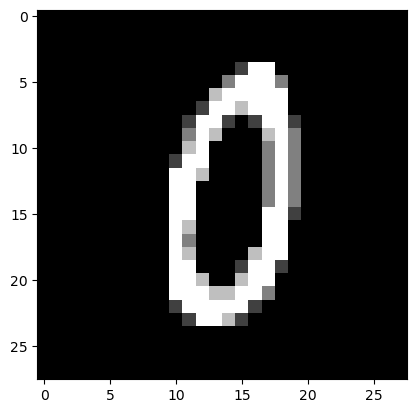

Prediction:  [9]
Label:  7


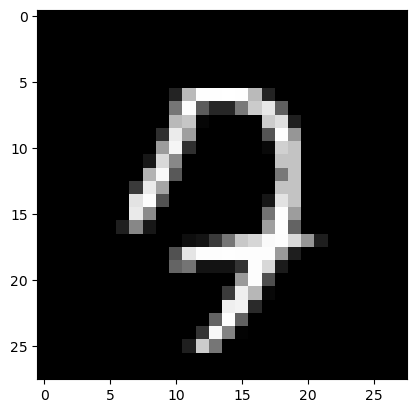

In [17]:
test_prediction(4, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(31, W1, b1, W2, b2)